In [1]:
from confer.utils import str_to_path
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from rep.utils_data import SourceData
from scipy.stats.stats import pearsonr
import copy
sns.set()
sns.color_palette("colorblind", 8)
# sns.set_context("poster")
sns.set_style("whitegrid")
mpl.rcParams["legend.loc"] = "upper right"
FONT_SIZE = 40
params = {
    "axes.labelsize": FONT_SIZE,  # fontsize for x and y labels (was 10)
    "axes.titlesize": FONT_SIZE,
    "font.size": FONT_SIZE,  # was 10
    "legend.fontsize": FONT_SIZE,  # was 10
    "xtick.labelsize": FONT_SIZE,
    "ytick.labelsize": FONT_SIZE,
    "font.family": "Times New Roman",
}
mpl.rcParams.update(params)

In [2]:
pv_files = !ls /home/scribbler/data/prophesy-data/PVSandbox2015/*.h5
wind_files = !ls /home/scribbler/data/prophesy-data/WindSandbox2015/*.h5

In [3]:
df_wind_sample = SourceData(wind_files[0],standardize=False).df_train
df_pv_sample = SourceData(pv_files[0],standardize=False).df_train

/home/scribbler/anaconda/lib/python3.8/site-packages/fastai/tabular/core.py:148: UserWarning: Using inplace with splits will trigger a pandas error. Set `pd.options.mode.chained_assignment=None` to avoid it.
  warn("Using inplace with splits will trigger a pandas error. Set `pd.options.mode.chained_assignment=None` to avoid it.")
/home/scribbler/anaconda/lib/python3.8/site-packages/fastai/tabular/core.py:148: UserWarning: Using inplace with splits will trigger a pandas error. Set `pd.options.mode.chained_assignment=None` to avoid it.
  warn("Using inplace with splits will trigger a pandas error. Set `pd.options.mode.chained_assignment=None` to avoid it.")


In [19]:
def plot(df, col, start, length_plot):
    end = start+length_plot
    
    ax1 = df[start:end].PowerGeneration.plot(
        figsize=(16, 11), style="-", linewidth=2
    )
    df[start:end][col].plot(figsize=(16, 9), style="--", linewidth=2)

    plt.ylabel("Normalized Power")
    plt.xlabel("Time")

    plt.setp(ax1.get_xticklabels()[0], visible=False)
    plt.legend(
            loc="upper center",
            bbox_to_anchor=(0.5, 1.3),
            ncol=2,
            fancybox=True,
            shadow=True,
            )
    plt.tight_layout()
    plt.savefig(f"../doc/figs/ts_{col}.pdf")
    plt.show()
    plt.close()

    df.plot(
        x=col, y="PowerGeneration", kind="scatter", figsize=(16, 11)
    )
    plt.tight_layout()
    plt.ylabel("Normalized Power Generation")
    plt.xlabel(f"Normalized {col}")
    plt.setp(ax1.get_xticklabels()[0], visible=False)
    plt.savefig(f"../doc/figs/sc_{col}.pdf")
    plt.show()
    plt.close()

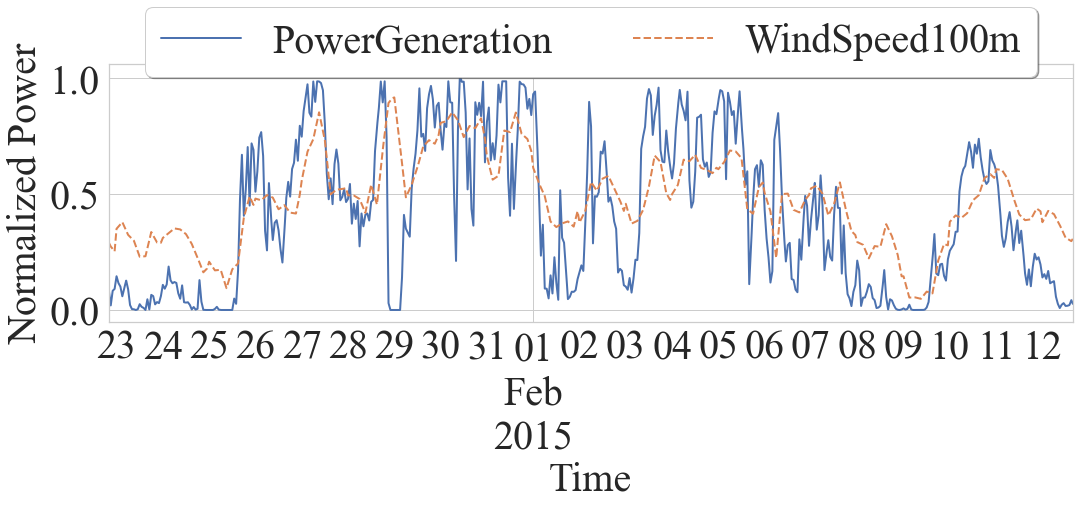

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


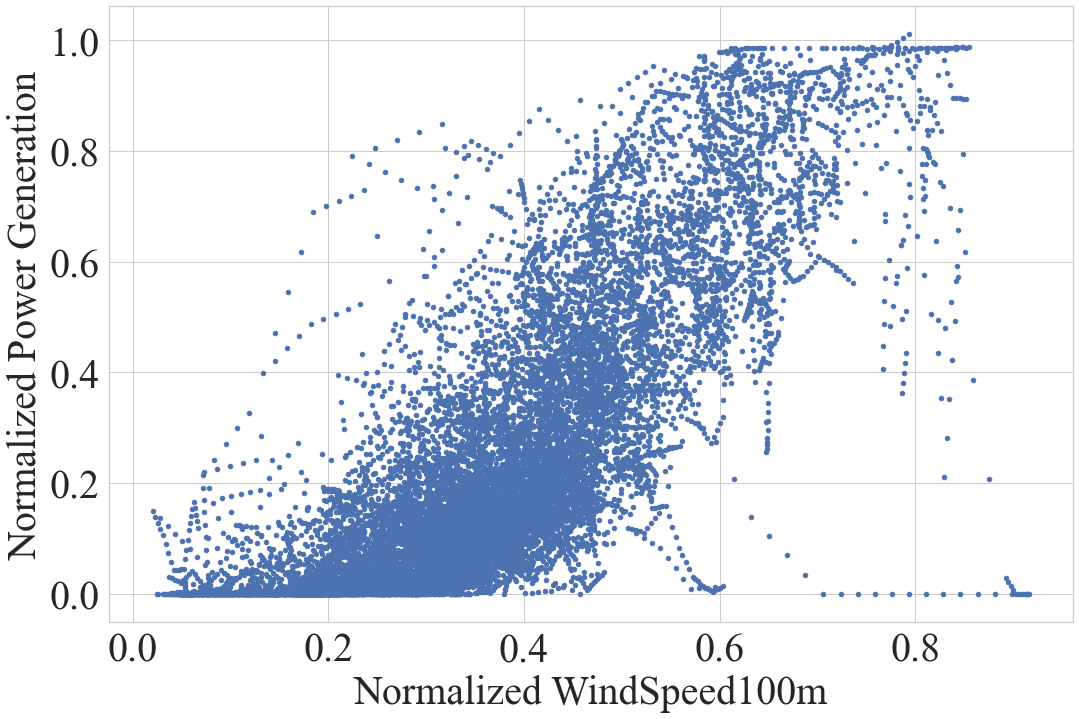

In [20]:
plot(df_wind_sample, col = "WindSpeed100m", start=2000, length_plot=2000)

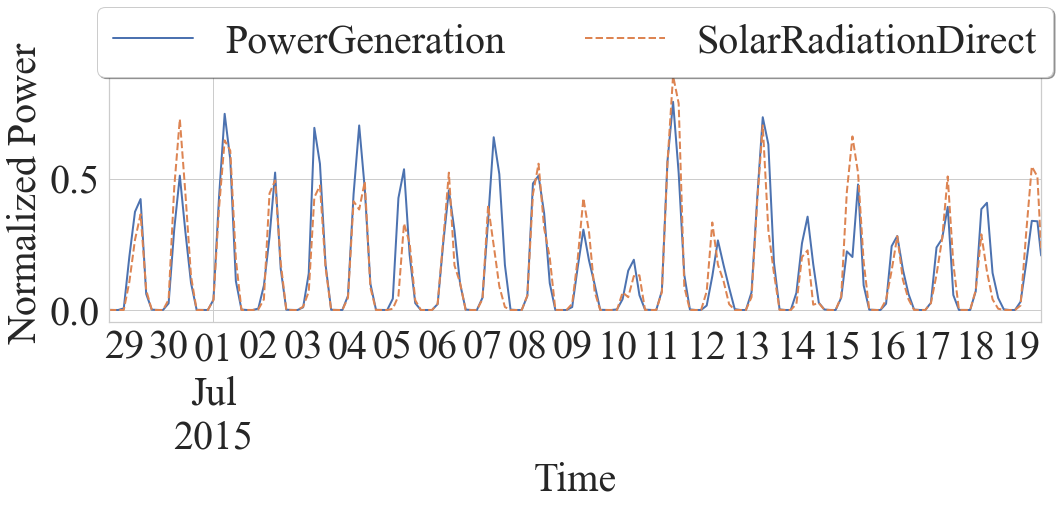

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


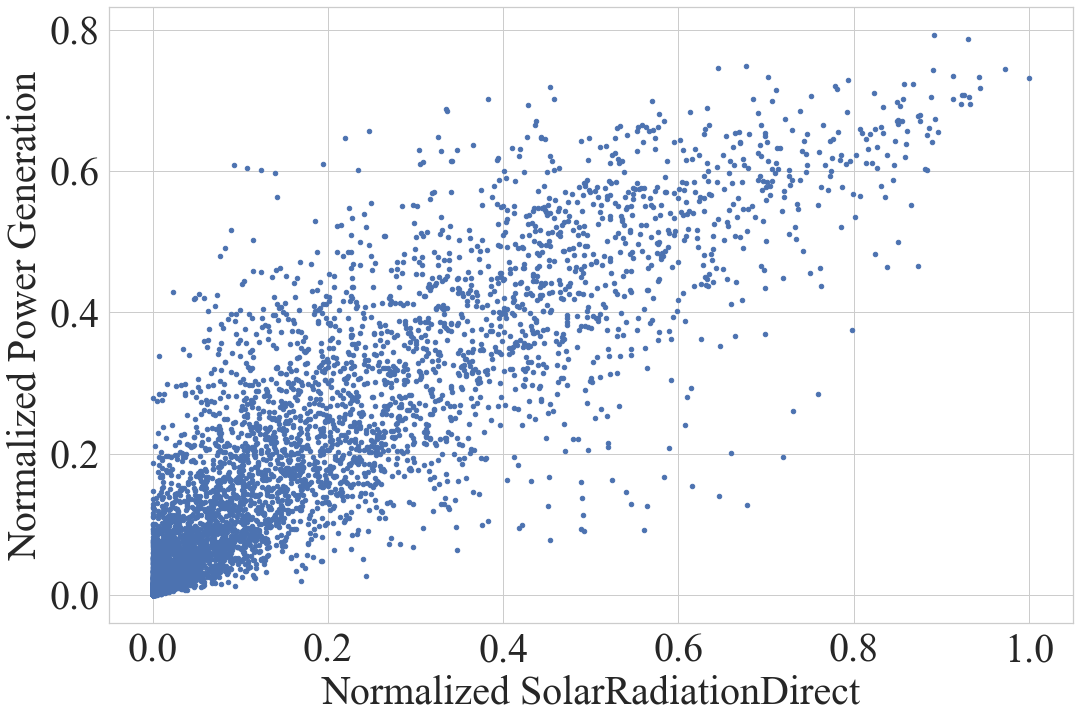

In [21]:
plot(df_pv_sample, col = "SolarRadiationDirect", start=4000, length_plot=500)